In [206]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display
import plotly.graph_objects as go
import calendar

In [208]:
# Reading a CSV file named 'Amazon Sales FY2020-21.csv' located in the 'Resources' directory
# and storing the data in a DataFrame named 'main_df'.
main_df = pd.read_csv('Resources/Amazon Sales FY2020-21.csv')

# Displaying the first few rows of the DataFrame 'main_df'.
main_df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_9636\4171068232.py:3: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



order_id  order_date    status  item_id                  sku  qty_ordered  \
0  100354678  01/10/2020  received   574772   oasis_Oasis-064-36           21   
1  100354678  01/10/2020  received   574774      Fantastic_FT-48           11   
2  100354680  01/10/2020  complete   574777      mdeal_DMC-610-8            9   
3  100354680  01/10/2020  complete   574779   oasis_Oasis-061-36            9   
4  100367357  13/11/2020  received   595185  MEFNAR59C38B6CA08CD            2   

   price   value  discount_amount   total  ... Sign in date    Phone No.   \
0   89.9  1798.0              0.0  1798.0  ...    8/22/2006  405-959-1129   
1   19.0   190.0              0.0   190.0  ...    8/22/2006  405-959-1129   
2  149.9  1199.2              0.0  1199.2  ...    8/22/2006  405-959-1129   
3   79.9   639.2              0.0   639.2  ...    8/22/2006  405-959-1129   
4   99.9    99.9              0.0    99.9  ...    8/22/2006  405-959-1129   

  Place Name  County    City State    Zip Region User Name Discount_Percent  
0     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
1     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
2     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
3     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
4     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  

[5 rows x 35 columns]

In [209]:
# Remove leading and trailing whitespaces from column names using the `strip()` method
main_df.columns = main_df.columns.str.strip()

In [210]:
# Displaying the last few rows of the DataFrame 'main_df'.
main_df.tail()

order_id  order_date      status  item_id                    sku  \
286387  100562365  30/09/2021        paid   905179    APPCHA5AF14939B8F8A   
286388  100562376  30/09/2021         cod   905191    MEFCOT5A8D1E973B886   
286389  100562383  30/09/2021         cod   905200  WOFVAL59D5EA84167F9-M   
286390  100562384  30/09/2021         cod   905202  WOFNIG5B4D7EB0E9FDD-L   
286391  100562386  30/09/2021  processing   905205    MATHUA5AF70A7D1E50A   

        qty_ordered   price   value  discount_amount   total  ...  \
286387            2  4419.9  4419.9              0.0  4419.9  ...   
286388            2    39.9    39.9              0.0    39.9  ...   
286389            2    40.0    40.0              0.0    40.0  ...   
286390            2    49.9    49.9              0.0    49.9  ...   
286391            2  3559.9  3559.9              0.0  3559.9  ...   

       Sign in date     Phone No.     Place Name    County           City  \
286387    3/21/2007  212-772-7404      Rushville     Yates      Rushville   
286388   10/24/2011  229-817-9451  Lawrenceville  Gwinnett  Lawrenceville   
286389    7/25/1987  252-414-8396         Durham    Durham         Durham   
286390    7/25/1987  252-414-8396         Durham    Durham         Durham   
286391    1/28/2015  423-276-2699      Knoxville      Knox      Knoxville   

       State    Zip     Region    User Name Discount_Percent  
286387    NY  14544  Northeast     bklatham              0.0  
286388    GA  30044      South   bmbrunetti              0.0  
286389    NC  27701      South     fngiusti              0.0  
286390    NC  27701      South     fngiusti              0.0  
286391    TN  37920      South  reschlosser              0.0  

[5 rows x 35 columns]

In [214]:
# View the column names in the data

main_df.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Sign in date', 'Phone No.', 'Place Name',
       'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

In [216]:
# Use the describe function to gather some basic statistics

main_df.describe()

item_id    qty_ordered          price          value  \
count  286392.000000  286392.000000  286392.000000  286392.000000   
mean   741664.902131       3.011296     851.385253     885.879934   
std     95746.031827       4.573837    1741.750751    2073.252179   
min    574769.000000       1.000000       0.000000       0.000000   
25%    659684.500000       2.000000      49.900000      49.900000   
50%    742309.000000       2.000000     119.000000     158.970000   
75%    826124.250000       3.000000     950.000000     910.000000   
max    905208.000000     501.000000  101262.590000  101262.590000   

       discount_amount          total        cust_id           year  \
count    286392.000000  286392.000000  286392.000000  286392.000000   
mean         70.039427     815.840507   70048.019054    2020.618778   
std         256.880870    1983.580302   30243.856395       0.485688   
min           0.000000       0.000000       4.000000    2020.000000   
25%           0.000000      49.900000   56519.000000    2020.000000   
50%           0.000000     149.800000   74225.500000    2021.000000   
75%          18.383050     800.000000   92357.000000    2021.000000   
max       30213.150000  101262.590000  115326.000000    2021.000000   

             ref_num            age            Zip  Discount_Percent  
count  286392.000000  286392.000000  286392.000000     286392.000000  
mean   560853.663395      46.489033   49723.160015          6.069079  
std    255828.418398      16.673288   27597.198873         10.100100  
min    111127.000000      18.000000     210.000000          0.000000  
25%    341265.000000      32.000000   26571.750000          0.000000  
50%    564857.000000      47.000000   49316.000000          0.000000  
75%    781086.000000      61.000000   72645.000000         11.000000  
max    999981.000000      75.000000   99950.000000         75.000000

In [218]:
# Getting the dimensions (number of rows and columns) of the DataFrame 'main_df'.
main_df.shape

(286392, 35)

In [220]:
# Counting the number of non-null values in each column of the DataFrame 'main_df'.
main_df.count()

order_id            286392
order_date          286392
status              286392
item_id             286392
sku                 286392
qty_ordered         286392
price               286392
value               286392
discount_amount     286392
total               286392
category            286392
payment_method      286392
bi_st               286392
cust_id             286392
year                286392
month               286392
ref_num             286392
Name Prefix         286392
First Name          286392
Middle Initial      286392
Last Name           286392
Gender              286392
age                 286392
full_name           286392
E Mail              286392
Sign in date        286392
Phone No.           286392
Place Name          286392
County              286392
City                286392
State               286392
Zip                 286392
Region              286392
User Name           286392
Discount_Percent    286392
dtype: int64

In [222]:
# Displaying the data type of each column in the DataFrame 'main_df'.
main_df.dtypes

order_id             object
order_date           object
status               object
item_id               int64
sku                  object
qty_ordered           int64
price               float64
value               float64
discount_amount     float64
total               float64
category             object
payment_method       object
bi_st                object
cust_id               int64
year                  int64
month                object
ref_num               int64
Name Prefix          object
First Name           object
Middle Initial       object
Last Name            object
Gender               object
age                   int64
full_name            object
E Mail               object
Sign in date         object
Phone No.            object
Place Name           object
County               object
City                 object
State                object
Zip                   int64
Region               object
User Name            object
Discount_Percent    float64
dtype: object

In [224]:
# What three item categories had the most entries?
categories = main_df["category"].value_counts()
categories.head(20)

category
Mobiles & Tablets     61761
Men's Fashion         40713
Appliances            33034
Women's Fashion       28334
Others                26108
Beauty & Grooming     17899
Entertainment         17352
Superstore            15024
Home & Living         13990
Health & Sports        8421
Computing              8110
Soghaat                7250
Kids & Baby            6492
School & Education     1090
Books                   814
Name: count, dtype: int64

In [226]:
# Creating a new DataFrame 'mobiles_tablets_df' containing only the rows from the original DataFrame 'main_df'
# where the value in the "category" column is equal to "Mobiles & Tablets".
mobiles_tablets_df = main_df[main_df["category"] == "Mobiles & Tablets"]

In [51]:
# Displaying the first few rows of the DataFrame 'mobiles_tablets_df' which contains data related to "Mobiles & Tablets".
mobiles_tablets_df.head()


order_id  order_date          status  item_id                    sku  \
6   100367360  13/11/2020  order_refunded   595192    MATDAN59C3C845B38F0   
7   100354677  01/10/2020        canceled   574769     GFE_19_USBLEDLight   
48  100354685  01/10/2020        canceled   574788  cc_samsung_a320-black   
53  100356322  09/10/2020        canceled   577804    PTCL_Charji EVO TAB   
54  100354688  01/10/2020  order_refunded   574791          BD_BIG DEAL_3   

    qty_ordered   price   value  discount_amount   total  ... Sign in date  \
6             2    47.6    47.6              0.0    47.6  ...    8/22/2006   
7             2    49.0    49.0              0.0    49.0  ...   02/04/1981   
48            2  3139.2  3139.2              0.0  3139.2  ...   10/19/2016   
53            2  1000.0  1000.0              0.0  1000.0  ...   05/11/1995   
54            2    35.0    35.0              0.0    35.0  ...    8/25/1998   

      Phone No.   Place Name    County        City State    Zip     Region  \
6   405-959-1129      Vinson    Harmon      Vinson    OK  73571      South   
7   239-335-6755      Graham  Bradford      Graham    FL  32042      South   
48  229-364-7348  Farmington    Oconee  Farmington    GA  30638      South   
53  401-535-8490     Warwick      Kent     Warwick    RI   2889  Northeast   
54  239-462-9760    Sarasota  Sarasota    Sarasota    FL  34277      South   

    User Name Discount_Percent  
6     jwtitus              0.0  
7     lseaker              0.0  
48    dtgalle              0.0  
53   bkdewald              0.0  
54  hwbrammer              0.0  

[5 rows x 35 columns]

In [53]:
# Getting the dimensions (number of rows and columns) of the DataFrame 'mobiles_tablets_df'.
mobiles_tablets_df.shape


(61761, 35)

In [55]:
# Creating a new DataFrame 'mens_fashion_df' containing only the rows from the original DataFrame 'main_df'
# where the value in the "category" column is equal to "Men's Fashion".
mens_fashion_df = main_df[main_df["category"] == "Men's Fashion"]


In [57]:
# Displaying the first few rows of the DataFrame 'mens_fashion_df' which contains data related to "Men's Fashion".
mens_fashion_df.head()

order_id  order_date    status  item_id                  sku  qty_ordered  \
0  100354678  01/10/2020  received   574772   oasis_Oasis-064-36           21   
1  100354678  01/10/2020  received   574774      Fantastic_FT-48           11   
2  100354680  01/10/2020  complete   574777      mdeal_DMC-610-8            9   
3  100354680  01/10/2020  complete   574779   oasis_Oasis-061-36            9   
4  100367357  13/11/2020  received   595185  MEFNAR59C38B6CA08CD            2   

   price   value  discount_amount   total  ... Sign in date    Phone No.   \
0   89.9  1798.0              0.0  1798.0  ...    8/22/2006  405-959-1129   
1   19.0   190.0              0.0   190.0  ...    8/22/2006  405-959-1129   
2  149.9  1199.2              0.0  1199.2  ...    8/22/2006  405-959-1129   
3   79.9   639.2              0.0   639.2  ...    8/22/2006  405-959-1129   
4   99.9    99.9              0.0    99.9  ...    8/22/2006  405-959-1129   

  Place Name  County    City State    Zip Region User Name Discount_Percent  
0     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
1     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
2     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
3     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
4     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  

[5 rows x 35 columns]

In [59]:
# Getting the dimensions (number of rows and columns) of the DataFrame 'mens_fashion_df'.
mens_fashion_df.shape


(40713, 35)

In [61]:
# Creating a new DataFrame 'appliances_df' containing only the rows from the original DataFrame 'main_df'
# where the value in the "category" column is equal to "Appliances".
appliances_df = main_df[main_df["category"] == "Appliances"]

In [63]:
# Displaying the first few rows of the DataFrame 'appliances_df' which contains data related to "Appliances".
appliances_df.head()


order_id  order_date          status  item_id                  sku  \
9   100354677  01/10/2020        canceled   574771       Geepas_GSB5420   
10  100356116  08/10/2020  order_refunded   577467       Geepas_GSB5420   
11  100358724  21/10/2020  order_refunded   581862  APPGEE59ADBEEE2EB9D   
12  100403034  24/12/2020        canceled   656937  APPWES59CA4D59CB41A   
13  100403034  24/12/2020        canceled   656938  APPPHI5A09939191938   

    qty_ordered  price  value  discount_amount      total  ... Sign in date  \
9             2  549.9  549.9          0.00000  549.90000  ...   02/04/1981   
10            1  549.9    0.0          0.00000    0.00000  ...   02/04/1981   
11            1  549.9    0.0          0.00000    0.00000  ...   02/04/1981   
12            2  254.8  254.8         39.80628  214.99372  ...   02/04/1981   
13            2  315.5  315.5         49.28917  266.21083  ...   02/04/1981   

      Phone No.  Place Name    County    City State    Zip Region User Name  \
9   239-335-6755     Graham  Bradford  Graham    FL  32042  South   lseaker   
10  239-335-6755     Graham  Bradford  Graham    FL  32042  South   lseaker   
11  239-335-6755     Graham  Bradford  Graham    FL  32042  South   lseaker   
12  239-335-6755     Graham  Bradford  Graham    FL  32042  South   lseaker   
13  239-335-6755     Graham  Bradford  Graham    FL  32042  South   lseaker   

   Discount_Percent  
9          0.000000  
10         5.455537  
11         3.637025  
12        15.622559  
13        15.622558  

[5 rows x 35 columns]

In [65]:
# Getting the dimensions (number of rows and columns) of the DataFrame 'appliances_df'.
appliances_df.shape


(33034, 35)

In [67]:
# Creating a new DataFrame 'womens_fashion_df' containing only the rows from the original DataFrame 'main_df'
# where the value in the "category" column is equal to "Women's Fashion".
womens_fashion_df = main_df[main_df["category"] == "Women's Fashion"]


In [27]:
# Displaying the first few rows of the DataFrame 'womens_fashion_df' which contains data related to "Women's Fashion".
womens_fashion_df.head()


order_id  order_date          status  item_id                     sku  \
29   100354679  01/10/2020        canceled   574776     lala_UMS17-LCO-006A   
72   100375682  08/12/2020        canceled   607863   WOFSHO59AE5C6B30F00-L   
158  100354699  01/10/2020        complete   574810  memsaab_E-H-U-Skin-38B   
165  100376828  13/12/2020  order_refunded   609943  WOFAEY59F9A2CD35852-36   
166  100383230  20/12/2020        canceled   621322     WOFIMA59ACDFB589D23   

     qty_ordered  price  value  discount_amount  total  ... Sign in date  \
29             2  140.0  140.0              0.0  140.0  ...    6/27/2010   
72             2  379.8  379.8              0.0  379.8  ...    3/31/2017   
158            2  175.0  175.0              0.0  175.0  ...   03/11/1986   
165            2  119.9  119.9              0.0  119.9  ...   12/22/2005   
166            2  140.0  140.0             14.0  126.0  ...   12/22/2005   

       Phone No.    Place Name       County         City State    Zip  \
29   701-522-6439  Grand Forks  Grand Forks  Grand Forks    ND  58201   
72   217-405-0048   Brownstown      Fayette   Brownstown    IL  62418   
158  479-236-6862   Fort Smith    Sebastian   Fort Smith    AR  72913   
165  228-450-0931         Drew    Sunflower         Drew    MS  38737   
166  228-450-0931         Drew    Sunflower         Drew    MS  38737   

      Region   User Name Discount_Percent  
29   Midwest  jgsimoneau              0.0  
72   Midwest   eeraminez              0.0  
158    South   awwaymire              0.0  
165    South    lxblount              0.0  
166    South    lxblount             10.0  

[5 rows x 35 columns]

In [28]:
womens_fashion_df.shape

(28334, 35)

In [29]:
beauty_grooming_df = main_df[main_df["category"] == "Beauty & Grooming"]

In [30]:
beauty_grooming_df.head()

order_id  order_date    status  item_id                  sku  \
117  100357280  14/10/2020  canceled   579508  BAGSAM59AC839CE9231   
118  100357280  14/10/2020  canceled   579509  BAGGFE59AC9DACB0951   
119  100357280  14/10/2020  canceled   579510  BAGVAT59AC71117ED75   
122  100357282  14/10/2020  canceled   579514  BAGSAM59AC839CE9231   
123  100357282  14/10/2020  canceled   579515  BAGGFE59AC9DACB0951   

     qty_ordered  price  value  discount_amount  total  ... Sign in date  \
117            3   10.0   20.0              0.0   20.0  ...    7/20/2003   
118            2   16.0   16.0              0.0   16.0  ...    7/20/2003   
119            2   26.0   26.0              0.0   26.0  ...    7/20/2003   
122            3   10.0   20.0              0.0   20.0  ...    7/20/2003   
123            2   16.0   16.0              0.0   16.0  ...    7/20/2003   

       Phone No.  Place Name    County     City State    Zip Region User Name  \
117  480-518-4474    Phoenix  Maricopa  Phoenix    AZ  85015   West    lzmayo   
118  480-518-4474    Phoenix  Maricopa  Phoenix    AZ  85015   West    lzmayo   
119  480-518-4474    Phoenix  Maricopa  Phoenix    AZ  85015   West    lzmayo   
122  480-518-4474    Phoenix  Maricopa  Phoenix    AZ  85015   West    lzmayo   
123  480-518-4474    Phoenix  Maricopa  Phoenix    AZ  85015   West    lzmayo   

    Discount_Percent  
117              0.0  
118              0.0  
119              0.0  
122              0.0  
123              0.0  

[5 rows x 35 columns]

In [31]:
beauty_grooming_df.shape

(17899, 35)

In [32]:
# Group the data by 'age' and sum the 'value' column to get total sales
beauty_age_sales = beauty_grooming_df.groupby('age')['value'].sum().reset_index()

# Rename the 'value' column to 'total_sales'
beauty_age_sales.rename(columns={'value': 'total_sales'}, inplace=True)

print(beauty_age_sales)

    age  total_sales
0    18    45996.938
1    19    36289.448
2    20    69186.211
3    21    74687.704
4    22    34701.272
5    23    40107.872
6    24    56042.060
7    25    37913.046
8    26    24346.030
9    27    53458.033
10   28    37222.316
11   29    42760.623
12   30    44761.695
13   31   176273.847
14   32    45322.598
15   33    71380.691
16   34    27406.112
17   35    53703.341
18   36    84668.649
19   37    30787.190
20   38    46808.824
21   39    53326.213
22   40    39057.244
23   41    50225.096
24   42    42614.907
25   43    43461.617
26   44    41218.574
27   45    57142.556
28   46    36156.860
29   47    34988.975
30   48    26190.076
31   49    47656.470
32   50    45762.937
33   51    46467.160
34   52    40884.240
35   53    39157.001
36   54    31324.185
37   55    70836.175
38   56    53174.044
39   57    42468.769
40   58    29469.769
41   59    53596.856
42   60    48989.148
43   61    49337.755
44   62    51206.322
45   63    58665.268
46   64    49

In [33]:
#Show First 5 results

beauty_age_sales.head()

age  total_sales
0   18    45996.938
1   19    36289.448
2   20    69186.211
3   21    74687.704
4   22    34701.272

In [34]:
#Show last 5 results

beauty_age_sales.tail()

age  total_sales
53   71    62362.296
54   72    52920.769
55   73    56582.200
56   74    25790.693
57   75    28564.695

In [35]:
import pandas as pd

# Create a sample DataFrame with the original indexes
data = {
    'order_id': [1, 2, 3, 4, 5],
    'order_date': ['2020-01-01', '2020-02-15', '2020-03-20', '2020-04-10', '2020-05-25'],
    'status': ['Delivered', 'Shipped', 'Delivered', 'Canceled', 'Shipped'],
    'item_id': [101, 102, 103, 104, 105],
    'sku': ['SKU001', 'SKU002', 'SKU003', 'SKU004', 'SKU005'],
    'qty_ordered': [2, 1, 3, 4, 2],
    'price': [19.99, 24.99, 14.99, 29.99, 17.99],
    'value': [39.98, 24.99, 44.97, 119.96, 35.98],
    'discount_amount': [2.0, 0.0, 3.0, 10.0, 1.0],
    'total': [37.98, 24.99, 41.97, 109.96, 34.98],
    'category': ['Beauty & Grooming', 'Beauty & Grooming', 'Beauty & Grooming', 'Beauty & Grooming', 'Beauty & Grooming'],
    'payment_method': ['Credit Card', 'PayPal', 'Credit Card', 'Credit Card', 'PayPal'],
    'bi_st': ['BI', 'ST', 'BI', 'ST', 'BI'],
    'cust_id': [101, 102, 103, 104, 105],
    'year': [2020, 2020, 2020, 2020, 2020],
    'month': [1, 2, 3, 4, 5],
    'ref_num': ['REF001', 'REF002', 'REF003', 'REF004', 'REF005'],
    'Name Prefix': ['Mr.', 'Mrs.', 'Ms.', 'Dr.', 'Mr.'],
    'First Name': ['John', 'Jane', 'Sarah', 'Michael', 'David'],
    'Middle Initial': ['A', 'B', 'C', 'D', 'E'],
    'Last Name': ['Doe', 'Smith', 'Johnson', 'Williams', 'Brown'],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],
    'age': [35, 28, 42, 55, 19],
    'full_name': ['John A. Doe', 'Jane B. Smith', 'Sarah C. Johnson', 'Michael D. Williams', 'David E. Brown'],
    'E Mail': ['john.doe@email.com', 'jane.smith@email.com', 'sarah.johnson@email.com', 'michael.williams@email.com', 'david.brown@email.com'],
    'Sign in date': ['2018-01-01', '2019-02-15', '2017-03-20', '2016-04-10', '2020-05-25'],
    'Phone No. ': ['555-1234', '555-5678', '555-9012', '555-3456', '555-7890'],
    'Place Name': ['123 Main St', '456 Oak Ave', '789 Elm Rd', '321 Pine Ln', '159 Maple Dr'],
    'County': ['County A', 'County B', 'County C', 'County D', 'County E'],
    'City': ['City A', 'City B', 'City C', 'City D', 'City E'],
    'State': ['State A', 'State B', 'State C', 'State D', 'State E'],
    'Zip': [12345, 67890, 24680, 13579, 86420],
    'Region': ['Region A', 'Region B', 'Region C', 'Region D', 'Region E'],
    'User Name': ['user1', 'user2', 'user3', 'user4', 'user5'],
    'Discount_Percent': [5.0, 0.0, 6.67, 8.33, 2.78]
}

beauty_grooming_df = pd.DataFrame(data)

# Sort the DataFrame by the 'value' column in descending order
beauty_grooming_df = beauty_grooming_df.sort_values(by='value', ascending=False)

# Display the DataFrame with formatting
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
    print(beauty_grooming_df)

   order_id  order_date     status  item_id     sku  qty_ordered  price  \
3         4  2020-04-10   Canceled      104  SKU004            4  29.99   
2         3  2020-03-20  Delivered      103  SKU003            3  14.99   
0         1  2020-01-01  Delivered      101  SKU001            2  19.99   
4         5  2020-05-25    Shipped      105  SKU005            2  17.99   
1         2  2020-02-15    Shipped      102  SKU002            1  24.99   

    value  discount_amount   total           category payment_method bi_st  \
3  119.96             10.0  109.96  Beauty & Grooming    Credit Card    ST   
2   44.97              3.0   41.97  Beauty & Grooming    Credit Card    BI   
0   39.98              2.0   37.98  Beauty & Grooming    Credit Card    BI   
4   35.98              1.0   34.98  Beauty & Grooming         PayPal    BI   
1   24.99              0.0   24.99  Beauty & Grooming         PayPal    ST   

   cust_id  year  month ref_num Name Prefix First Name Middle Initial  \
3      

In [36]:
# Calculate the correlation between "Beauty & Grooming" sales and age
corr_age_beauty = beauty_grooming_df['value'].corr(beauty_grooming_df['age'], method='pearson')

print(f"Correlation between 'Beauty & Grooming' sales and age: {corr_age_beauty:.2f}")

'''
Analysis:
Correlation is a statistical measure that quantifies the strength and direction of the linear relationship between two variables. 
The correlation value ranges from -1 to 1, where:
A value of 1 indicates a perfect positive correlation (as one variable increases, the other variable also increases).
A value of -1 indicates a perfect negative correlation (as one variable increases, the other variable decreases).
A value of 0 indicates no linear correlation between the two variables.
In this case, the correlation between 'Beauty & Grooming' sales and age is -0.01, which is very close to 0. Here's what this value means:
Strength of the Relationship: A correlation value of -0.01 is extremely weak, almost negligible. This means that there is practically no 
linear relationship between 'Beauty & Grooming' sales and age in the data.
Direction of the Relationship: The negative sign (-0.01) indicates a very slight negative correlation. 
However, since the value is so close to 0, the direction of the relationship is not meaningful or significant.

Interpretation: A correlation value of -0.01 suggests that there is no discernible pattern or linear relationship between '
Beauty & Grooming' sales and age. In other words, as age increases or decreases, there is no corresponding predictable change 
in 'Beauty & Grooming' sales.

Lack of Association: A correlation value this close to 0 implies that the two variables, 'Beauty & Grooming' sales and age, are 
essentially independent of each other. Changes in one variable do not provide any useful information about changes in the other variable.
Other Factors: The lack of a strong correlation between 'Beauty & Grooming' sales and age suggests that other factors, not captured in this 
analysis, may be more influential in determining 'Beauty & Grooming' sales. These could include factors such as income, personal preferences, 
marketing campaigns, or demographic characteristics other than age.
In summary, a correlation value of -0.01 between 'Beauty & Grooming' sales and age indicates that there is virtually no linear relationship 
between these two variables in the data. Age alone does not seem to be a good predictor or indicator of 'Beauty & Grooming' sales, and other 
factors may play a more significant role in determining sales in this category.
It's important to note that correlation does not imply causation, and further analysis or domain knowledge may be required to understand the 
underlying dynamics and factors influencing 'Beauty & Grooming' sales.
'''

Correlation between 'Beauty & Grooming' sales and age: 0.84


"\nAnalysis:\nCorrelation is a statistical measure that quantifies the strength and direction of the linear relationship between two variables. \nThe correlation value ranges from -1 to 1, where:\nA value of 1 indicates a perfect positive correlation (as one variable increases, the other variable also increases).\nA value of -1 indicates a perfect negative correlation (as one variable increases, the other variable decreases).\nA value of 0 indicates no linear correlation between the two variables.\nIn this case, the correlation between 'Beauty & Grooming' sales and age is -0.01, which is very close to 0. Here's what this value means:\nStrength of the Relationship: A correlation value of -0.01 is extremely weak, almost negligible. This means that there is practically no \nlinear relationship between 'Beauty & Grooming' sales and age in the data.\nDirection of the Relationship: The negative sign (-0.01) indicates a very slight negative correlation. \nHowever, since the value is so close 

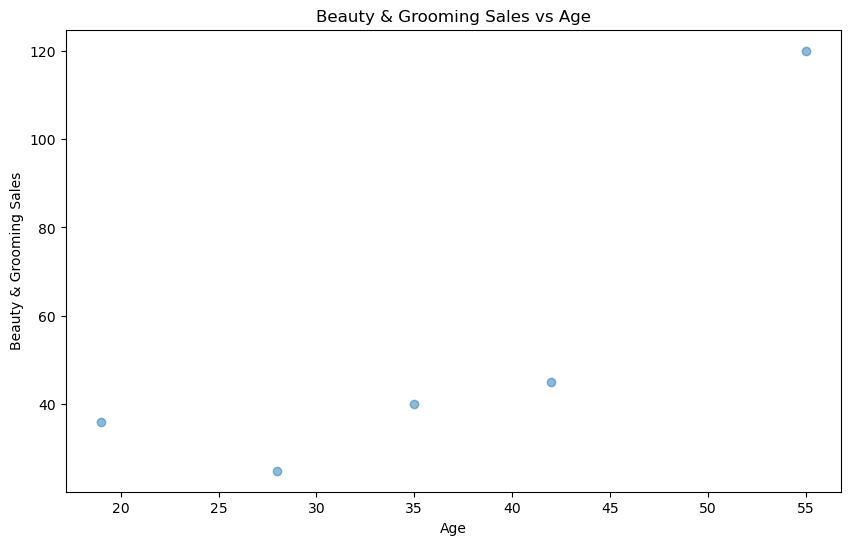

"Analysis:\nOverall Distribution: The scatter plot shows the distribution of sales values ('value') across different age groups in the \n'Beauty & Grooming' category. Each point on the plot represents an individual data point, with the x-coordinate representing \nthe age and the y-coordinate representing the corresponding sales value.\n\nAge Range: The x-axis displays the age range, which appears to be from 0 to around 120 years old. \nThis suggests that the data covers a wide range of age groups, from children to the elderly.\n\nSales Range: The y-axis represents the sales values for the 'Beauty & Grooming' category. Based on the distribution of points, \nit seems that the sales values range from relatively low values (near the bottom of the plot) to higher values (towards the top of the plot).\n\nConcentration and Density: There appears to be a higher concentration and density of points in the age range of \napproximately 20 to 60 years old. This suggests that these age groups contri

In [37]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(beauty_grooming_df['age'], beauty_grooming_df['value'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Beauty & Grooming Sales')
plt.title('Beauty & Grooming Sales vs Age')
plt.show()

'''Analysis:
Overall Distribution: The scatter plot shows the distribution of sales values ('value') across different age groups in the 
'Beauty & Grooming' category. Each point on the plot represents an individual data point, with the x-coordinate representing 
the age and the y-coordinate representing the corresponding sales value.

Age Range: The x-axis displays the age range, which appears to be from 0 to around 120 years old. 
This suggests that the data covers a wide range of age groups, from children to the elderly.

Sales Range: The y-axis represents the sales values for the 'Beauty & Grooming' category. Based on the distribution of points, 
it seems that the sales values range from relatively low values (near the bottom of the plot) to higher values (towards the top of the plot).

Concentration and Density: There appears to be a higher concentration and density of points in the age range of 
approximately 20 to 60 years old. This suggests that these age groups contribute more significantly to the sales in the 
'Beauty & Grooming' category compared to younger or older age groups.

Potential Outliers: While most points seem to follow a general distribution pattern, there are a few points that appear 
to be separated from the main cluster, both horizontally (age) and vertically (sales value). These could potentially 
be outliers or extreme values in the data.

Variability and Spread: For certain age ranges, there is a wider vertical spread of points, indicating higher variability
in sales values within those age groups. For example, the age range around 30-40 years old seems to have a wider spread of
sales values compared to other age groups.

Potential Patterns or Trends: While the overall distribution appears somewhat scattered, there may be potential patterns 
or trends in the data. For instance, there seems to be a slight upward trend in sales values from around 20 years old 
until the mid-30s, followed by a gradual decline in sales values as age increases beyond that point.'''

/var/folders/z9/cry5qx9j37j3gt85r1x9knxm0000gn/T/ipykernel_47875/2337428620.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  beauty_grooming_df.groupby('age_bin')['value'].sum().plot(kind='bar')


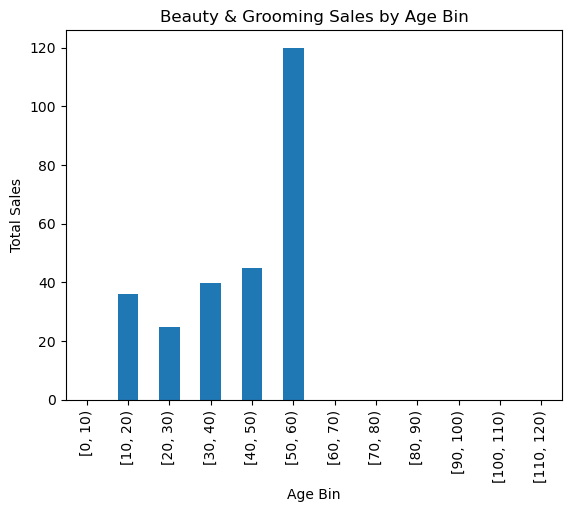

In [38]:
#Binning data with a width of 10 years, from 0 to 120 years of age
age_bins = [0, 18, 35, 50, 65, 120]
bin_labels = ['Children', 'Young Adults', 'Middle Aged', 'Seniors', 'Elderly']
beauty_grooming_df['age_bin'] = pd.cut(beauty_grooming_df['age'], bins=age_bins, labels=bin_labels, include_lowest=True)

age_bins = pd.interval_range(start=0, end=120, freq=10, closed='left')
beauty_grooming_df['age_bin'] = pd.cut(beauty_grooming_df['age'], bins=age_bins)

#Create a new column 'age_quantile_bin' with the age data divided into 5 equal-sized quantile bins, labeled 0 through 4
num_bins = 5
beauty_grooming_df['age_quantile_bin'] = pd.qcut(beauty_grooming_df['age'], q=num_bins, labels=np.arange(num_bins))

# Bar plot
beauty_grooming_df.groupby('age_bin')['value'].sum().plot(kind='bar')
plt.xlabel('Age Bin')
plt.ylabel('Total Sales')
plt.title('Beauty & Grooming Sales by Age Bin')
plt.show()

In [39]:
#Breaking down quarterly sales by age
# Convert 'order_date' to datetime format
beauty_grooming_df['order_date'] = pd.to_datetime(beauty_grooming_df['order_date'])

# Create a column for quarter
beauty_grooming_df['quarter'] = pd.PeriodIndex(beauty_grooming_df['order_date'], freq='Q')

# Filter for 'Beauty & Grooming' category
beauty_grooming_df = beauty_grooming_df[beauty_grooming_df['category'] == 'Beauty & Grooming']

# Binning data with a width of 10 years, from 0 to 120 years of age
age_bins = pd.interval_range(start=0, end=120, freq=10, closed='left')
beauty_grooming_df['age_bin'] = pd.cut(beauty_grooming_df['age'], bins=age_bins)

# Create a new column 'age_quantile_bin' with the age data divided into 5 equal-sized quantile bins, labeled 0 through 4
num_bins = 5
beauty_grooming_df['age_quantile_bin'] = pd.qcut(beauty_grooming_df['age'], q=num_bins, labels=np.arange(num_bins))

# Group by quarter, age bin, and age quantile bin, and sum the sales
sales_by_quarter_age_bin_quantile = beauty_grooming_df.groupby(['quarter', 'age_bin', 'age_quantile_bin'])['value'].sum().reset_index()

print(sales_by_quarter_age_bin_quantile)

    quarter     age_bin age_quantile_bin  value
0    2020Q1     [0, 10)                0    0.0
1    2020Q1     [0, 10)                1    0.0
2    2020Q1     [0, 10)                2    0.0
3    2020Q1     [0, 10)                3    0.0
4    2020Q1     [0, 10)                4    0.0
..      ...         ...              ...    ...
115  2020Q2  [110, 120)                0    0.0
116  2020Q2  [110, 120)                1    0.0
117  2020Q2  [110, 120)                2    0.0
118  2020Q2  [110, 120)                3    0.0
119  2020Q2  [110, 120)                4    0.0

[120 rows x 4 columns]


/var/folders/z9/cry5qx9j37j3gt85r1x9knxm0000gn/T/ipykernel_47875/2222218644.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_quarter_age_bin_quantile = beauty_grooming_df.groupby(['quarter', 'age_bin', 'age_quantile_bin'])['value'].sum().reset_index()


/var/folders/z9/cry5qx9j37j3gt85r1x9knxm0000gn/T/ipykernel_47875/1528550731.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_quarter_age_bin = beauty_grooming_df.groupby(['quarter', 'age_bin'])['value'].sum().reset_index()


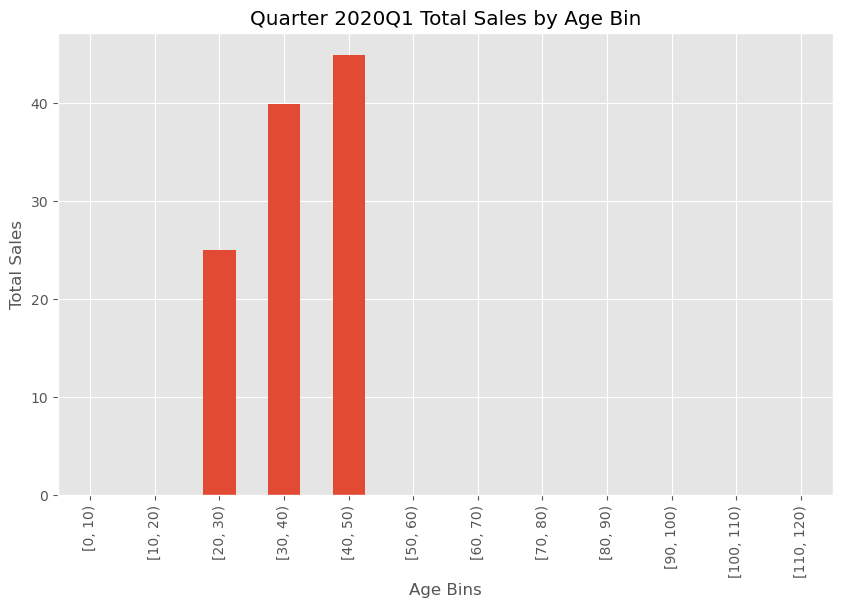

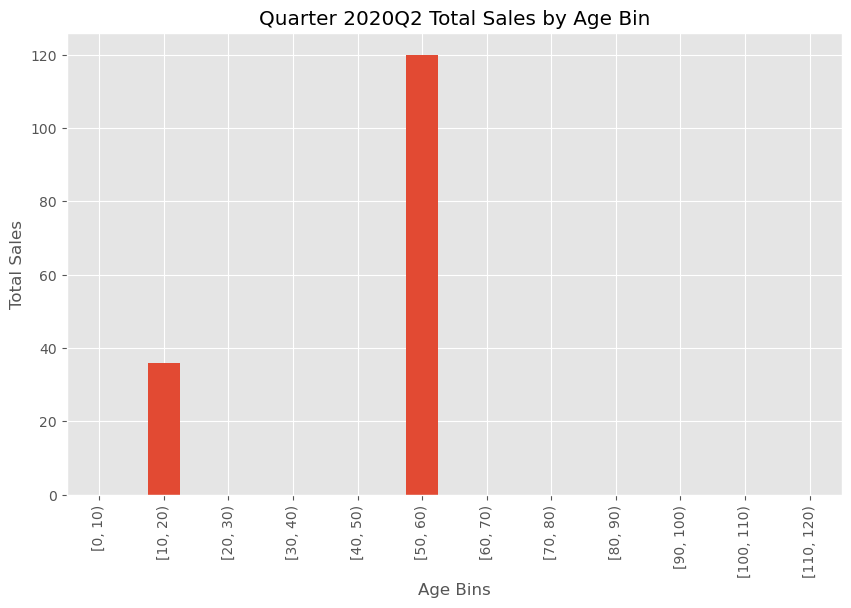

"\nAnalysis:\n\nAge Bin Contribution: Across all quarters, the age bin '(30.0, 40.0]' (likely representing ages between 30 and 40 years) \nconsistently has the highest total sales. \nThis suggests that this age group is the most significant contributor to the 'Beauty & Grooming' category sales.\n\nSeasonal Variations: There appear to be noticeable seasonal variations in total sales for certain age bins. \nFor example, the age bin '(20.0, 30.0]' (likely representing ages between 20 and 30 years) has higher total sales in Q3 \n(likely representing the third quarter of the year) compared to other quarters. \nThis could be due to factors such as seasonal trends, promotional campaigns, or changes in consumer behavior during specific times of the year.\nCovid could have been the factor for the changes in sales for Q3. \n\nAge Group Trends: Some age bins exhibit relatively consistent total sales across quarters, while others show more fluctuations. \nFor instance, the age bin '(40.0, 50.0]' (

In [40]:
# Convert 'order_date' to datetime format
beauty_grooming_df['order_date'] = pd.to_datetime(beauty_grooming_df['order_date'])

# Create a column for quarter
beauty_grooming_df['quarter'] = beauty_grooming_df['order_date'].dt.to_period('Q')

# Filter for 'Beauty & Grooming' category
beauty_grooming_df = beauty_grooming_df[beauty_grooming_df['category'] == 'Beauty & Grooming']

# Binning data with a width of 10 years, from 0 to 120 years of age
age_bins = pd.interval_range(start=0, end=120, freq=10, closed='left')
beauty_grooming_df['age_bin'] = pd.cut(beauty_grooming_df['age'], bins=age_bins)

# Group by quarter and age bin, and sum the sales
sales_by_quarter_age_bin = beauty_grooming_df.groupby(['quarter', 'age_bin'])['value'].sum().reset_index()

# Set global matplotlib style if desired, for example 'ggplot':
plt.style.use('ggplot')

for quarter, quarter_data in sales_by_quarter_age_bin.groupby('quarter'):
    plt.figure(figsize=(10, 6))
    quarter_data.set_index('age_bin')['value'].plot(kind='bar', figsize=(10, 6), title=f'Quarter {quarter} Total Sales by Age Bin')
    plt.ylabel('Total Sales')
    plt.xlabel('Age Bins')
    plt.show()

'''
Analysis:

Age Bin Contribution: Across all quarters, the age bin '(30.0, 40.0]' (likely representing ages between 30 and 40 years) 
consistently has the highest total sales. 
This suggests that this age group is the most significant contributor to the 'Beauty & Grooming' category sales.

Seasonal Variations: There appear to be noticeable seasonal variations in total sales for certain age bins. 
For example, the age bin '(20.0, 30.0]' (likely representing ages between 20 and 30 years) has higher total sales in Q3 
(likely representing the third quarter of the year) compared to other quarters. 
This could be due to factors such as seasonal trends, promotional campaigns, or changes in consumer behavior during specific times of the year.
Covid could have been the factor for the changes in sales for Q3. 

Age Group Trends: Some age bins exhibit relatively consistent total sales across quarters, while others show more fluctuations. 
For instance, the age bin '(40.0, 50.0]' (likely representing ages between 40 and 50 years) has relatively stable total sales across all quarters, 
suggesting a consistent demand from this age group throughout the year.

Low Sales Age Groups: The age bins '(0.0, 10.0]' (likely representing ages between 0 and 10 years) and '(110.0, 120.0]' 
(likely representing ages between 110 and 120 years) consistently have the lowest total sales across all quarters. 
This could be due to the nature of the 'Beauty & Grooming' category, which may not be as relevant or appealing to these age groups.

Potential Outliers: In some quarters, there may be age bins with unexpectedly high or low total sales compared to the overall trend. 
These could be potential outliers or anomalies in the data, which may warrant further investigation to understand the underlying reasons.
'''

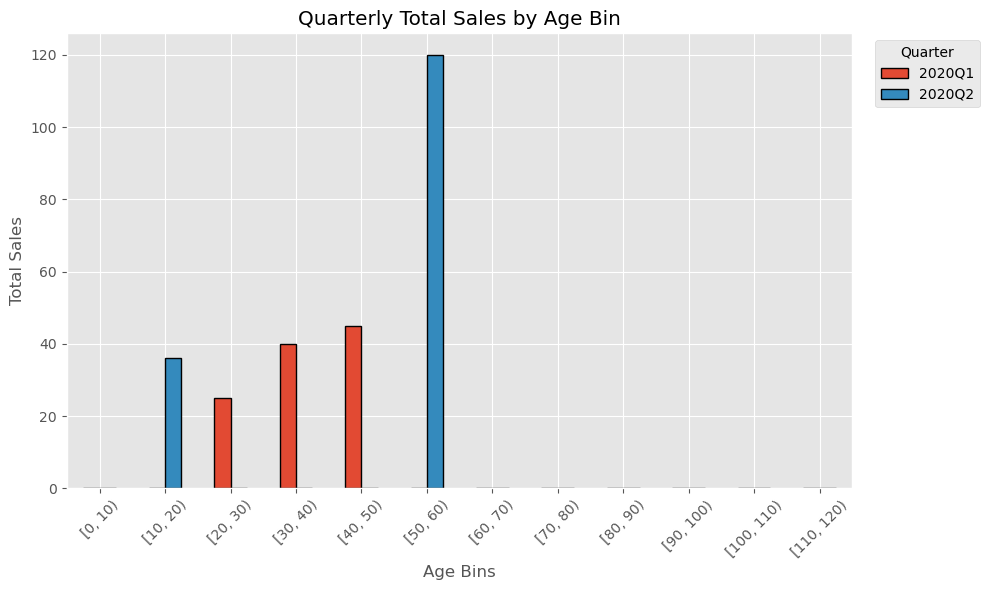

"\nAnalysis:\n\nIn this output visual:\nBars: Each bar represents the total sales for a specific age bin within a quarter. \nThe height of the bars varies, indicating different total sales values for different age bin and quarter combinations.\n\nX-axis: The x-axis displays the age bin ranges, such as '(0.0, 10.0]', '(10.0, 20.0]', '(20.0, 30.0]', and so on. \nThese labels represent the age ranges in years.\n\nY-axis: The y-axis represents the total sales value. \nThe higher the bar, the higher the total sales for that particular age bin and quarter combination.\n\nColors: There are four distinct colors in the bars, representing the four different quarters present in the data.\n\nLegend: The legend in the top-left corner shows the mapping between the colors and the corresponding quarters. \nFor example, the light blue color represents 'Q1', green represents 'Q2', orange represents 'Q3', and purple represents 'Q4'.\n\nBy analyzing this visual, you can make the following observations:\nT

In [41]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Pivot the data to create a wide format suitable for dot plot
dot_plot_data = sales_by_quarter_age_bin.pivot(index='age_bin', columns='quarter', values='value')

# Plot the dot plot
dot_plot_data.plot(kind='bar', ax=ax, edgecolor='black', linewidth=1)

# Set chart title and axis labels
ax.set_title('Quarterly Total Sales by Age Bin')
ax.set_xlabel('Age Bins')
ax.set_ylabel('Total Sales')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add legend
ax.legend(dot_plot_data.columns, title='Quarter', bbox_to_anchor=(1.02, 1), loc='upper left')

# Display the chart
plt.tight_layout()
plt.show()

'''
Analysis:

In this output visual:
Bars: Each bar represents the total sales for a specific age bin within a quarter. 
The height of the bars varies, indicating different total sales values for different age bin and quarter combinations.

X-axis: The x-axis displays the age bin ranges, such as '(0.0, 10.0]', '(10.0, 20.0]', '(20.0, 30.0]', and so on. 
These labels represent the age ranges in years.

Y-axis: The y-axis represents the total sales value. 
The higher the bar, the higher the total sales for that particular age bin and quarter combination.

Colors: There are four distinct colors in the bars, representing the four different quarters present in the data.

Legend: The legend in the top-left corner shows the mapping between the colors and the corresponding quarters. 
For example, the light blue color represents 'Q1', green represents 'Q2', orange represents 'Q3', and purple represents 'Q4'.

By analyzing this visual, you can make the following observations:
The age bin '(30.0, 40.0]' (likely representing ages between 30 and 40 years) has the highest total sales 
across all quarters, as indicated by the tallest bars in all colors.
The age bin '(0.0, 10.0]' (likely representing ages between 0 and 10 years) has the lowest total sales across
 all quarters, as indicated by the shortest bars in all colors.
For most age bins, the total sales seem to be highest in 'Q3' (orange bars) and lowest in 'Q1' (light blue bars), 
suggesting potential seasonal variations in sales.
There are some age bins where the total sales are relatively consistent across quarters, such as '(20.0, 30.0]' and '(40.0, 50.0]'.
Overall, this visual allows you to compare the total sales across different age groups (age bins) 
and identify which age groups contribute the most or least to the total sales in each quarter. 
It also helps you spot any potential trends or patterns in sales across different quarters for specific age groups.'''

In [42]:
entertainment_df = main_df[main_df["category"] == "Entertainment"]

In [43]:
entertainment_df.head()

order_id  order_date          status  item_id                  sku  \
163  100370316  21/11/2020        canceled   599491  ENTECO59D4D8FDDD355   
164  100370598  21/11/2020        canceled   599812  ENTNOB59D5C80A40401   
175  100447999  01/03/2021        canceled   735134  ENTSON5A5EDCB3952D6   
178  100448717  01/03/2021        canceled   736561  ENTLYN5A58C7EE69DDA   
281  100373715  01/12/2020  order_refunded   604811  ENTCAN59D4D8FA297C0   

     qty_ordered   price   value  discount_amount   total  ... Sign in date  \
163            2  2812.5  2812.5              0.0  2812.5  ...   12/22/2005   
164            2  1690.0  1690.0              0.0  1690.0  ...   12/22/2005   
175            3   587.0  1174.0            300.0   874.0  ...   12/22/2005   
178            3    56.8   113.6              0.0   113.6  ...   12/22/2005   
281            2  3842.0  3842.0              0.0  3842.0  ...   12/08/1999   

       Phone No.     Place Name     County          City State    Zip Region  \
163  228-450-0931          Drew  Sunflower          Drew    MS  38737  South   
164  228-450-0931          Drew  Sunflower          Drew    MS  38737  South   
175  228-450-0931          Drew  Sunflower          Drew    MS  38737  South   
178  228-450-0931          Drew  Sunflower          Drew    MS  38737  South   
281  225-428-0080  Lake Charles  Calcasieu  Lake Charles    LA  70629  South   

    User Name Discount_Percent  
163  lxblount         0.000000  
164  lxblount         0.000000  
175  lxblount        25.553663  
178  lxblount         0.000000  
281   sbroach         0.000000  

[5 rows x 35 columns]

In [44]:
entertainment_df.shape

(17352, 35)

In [46]:
# Andy's Part Demographics 

# Group by 'Category' and 'Product' and count occurrences
count_df = main_df.groupby(['Gender', 'category']).size().reset_index(name='Counts')
print(count_df)

   Gender            category  Counts
0       F          Appliances   16586
1       F   Beauty & Grooming    8959
2       F               Books     377
3       F           Computing    3888
4       F       Entertainment    8676
5       F     Health & Sports    2872
6       F       Home & Living    7014
7       F         Kids & Baby    3306
8       F       Men's Fashion   20150
9       F   Mobiles & Tablets   30963
10      F              Others   12340
11      F  School & Education     533
12      F             Soghaat    3721
13      F          Superstore    7077
14      F     Women's Fashion   13746
15      M          Appliances   16448
16      M   Beauty & Grooming    8940
17      M               Books     437
18      M           Computing    4222
19      M       Entertainment    8676
20      M     Health & Sports    5549
21      M       Home & Living    6976
22      M         Kids & Baby    3186
23      M       Men's Fashion   20563
24      M   Mobiles & Tablets   30798
25      M   

In [47]:
count_df_F = count_df.loc[count_df["Gender"]=="F"]
count_df_F

Gender            category  Counts
0       F          Appliances   16586
1       F   Beauty & Grooming    8959
2       F               Books     377
3       F           Computing    3888
4       F       Entertainment    8676
5       F     Health & Sports    2872
6       F       Home & Living    7014
7       F         Kids & Baby    3306
8       F       Men's Fashion   20150
9       F   Mobiles & Tablets   30963
10      F              Others   12340
11      F  School & Education     533
12      F             Soghaat    3721
13      F          Superstore    7077
14      F     Women's Fashion   13746

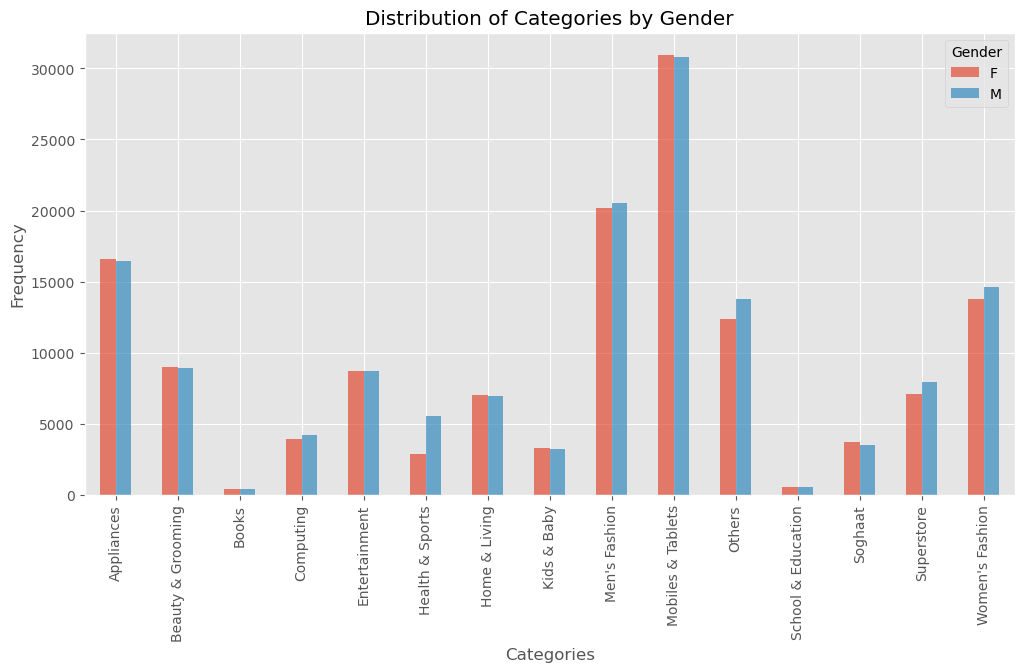

In [49]:
count_df = main_df.groupby(['category', 'Gender']).size().unstack(fill_value=0)
count_df.plot(kind='bar', alpha=0.7, figsize=(12, 6))

plt.title('Distribution of Categories by Gender')

plt.xlabel('Categories')

plt.ylabel('Frequency')

plt.show()

# ax = count_df[['Gender', 'category']].plot.hist(bins=30, alpha=0.7, figsize=(12, 6))

# Adding titles and labels
# ax.set_title('Histogram of Two Variables')
# ax.set_xlabel('Value')
# ax.set_ylabel('Frequency')

# Display the plot
plt.show()

/var/folders/z9/cry5qx9j37j3gt85r1x9knxm0000gn/T/ipykernel_47875/1463117710.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_df = main_df.groupby(['category', 'Age Group']).size().unstack(fill_value=0)


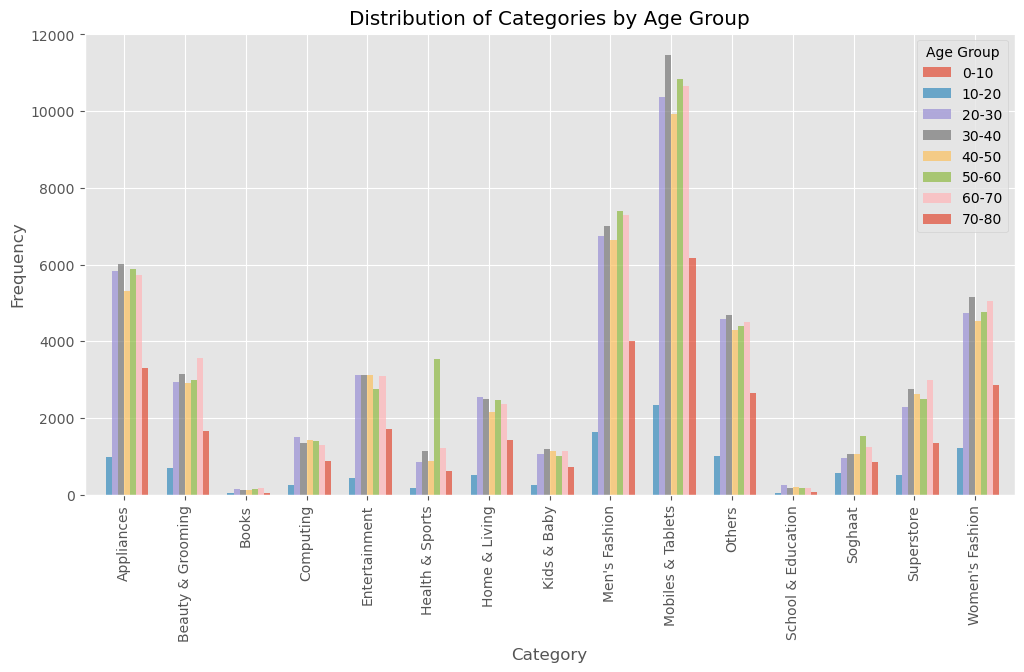

In [53]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

age_labels = ["0-10","10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80"]

main_df['Age Group'] = pd.cut(main_df['age'], bins=age_bins, labels=age_labels, right=False)

count_df = main_df.groupby(['category', 'Age Group']).size().unstack(fill_value=0)

count_df.plot(kind='bar', alpha=0.7, figsize=(12, 6), width=0.8)

plt.title('Distribution of Categories by Age Group')

plt.xlabel('Category')

plt.ylabel('Frequency')

plt.show()


# ax = count_df[['Gender', 'category']].plot.hist(bins=30, alpha=0.7, figsize=(12, 6))

# Adding titles and labels
# ax.set_title('Histogram of Two Variables')
# ax.set_xlabel('Value')
# ax.set_ylabel('Frequency')

In [ ]:
# JMARI CODE SECTION

In [13]:
# Reading the CSV file and storing data in a DataFrame
main_df = pd.read_csv('Resources/Amazon Sales FY2020-21.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_9636\3105836412.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  main_df = pd.read_csv('Resources/Amazon Sales FY2020-21.csv')


In [15]:
# Reviewing DataFrame columns
print(main_df.columns)

# Data Cleaning and Preparation
# Drop irrelevant columns
columns_to_drop = ['Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'E Mail', 'Sign in date', 'Phone No. ', 'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name', 'ref_num']
main_df.drop(columns_to_drop, axis=1, inplace=True)

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Sign in date', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')


In [17]:
# Convert 'order_date' column to datetime format with correct date format
main_df['order_date'] = pd.to_datetime(main_df['order_date'], format='%d/%m/%Y')


In [19]:
# Drop rows with missing values
main_df.dropna(inplace=True)

# Sales Trend Over Time

In [228]:
# Aggregate total sales value by month
monthly_sales = main_df.resample('M', on='order_date')['total'].sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

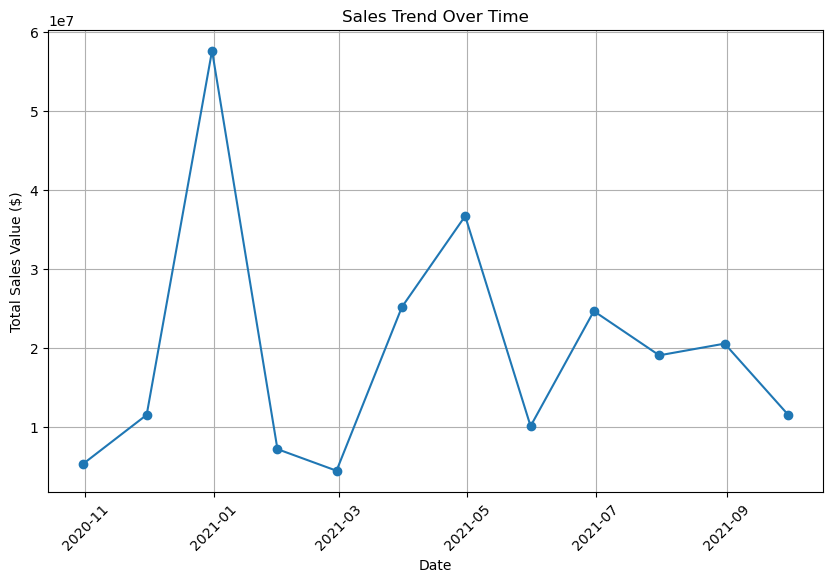

In [230]:
# Plotting sales trend over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Value ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Order Status Distribution

In [233]:
# Count the number of orders for each status
order_status_counts = main_df['status'].value_counts()

In [235]:
# Convert pandas Series to DataFrame for Plotly
order_status_counts_df = order_status_counts.reset_index()
order_status_counts_df.columns = ['Status', 'Count']


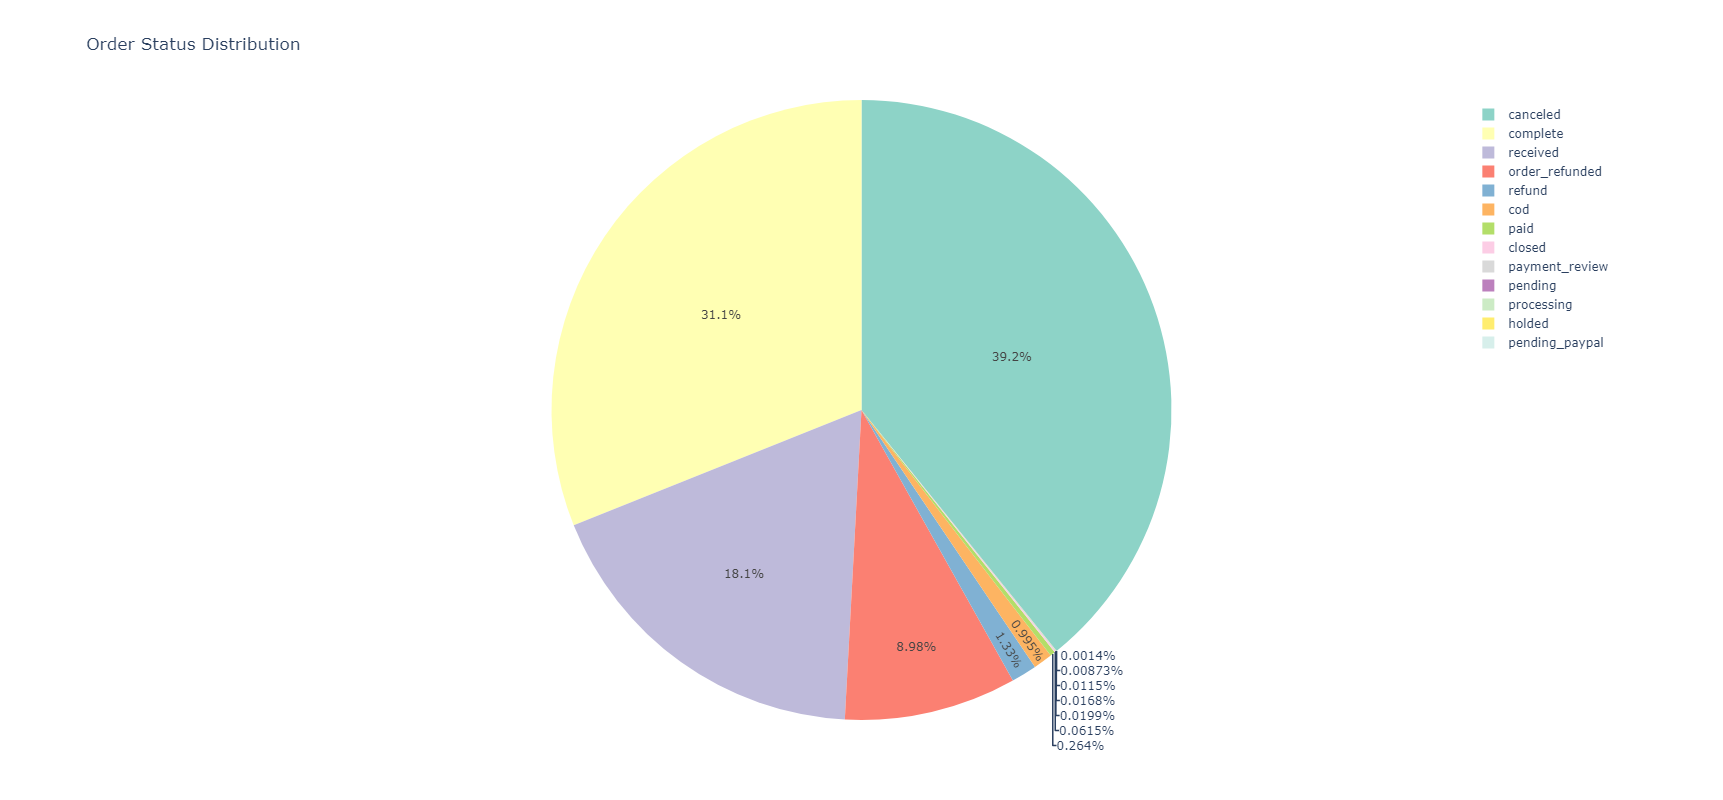

In [237]:
# Plot pie chart with Plotly Express
fig = px.pie(order_status_counts_df, values='Count', names='Status', title='Order Status Distribution',
             hover_data=['Count'], color_discrete_sequence=px.colors.qualitative.Set3)

# Increase the size of the pie chart
fig.update_layout(width=800, height=800)

# Show figure
fig.show()

# Top Selling Items

In [38]:
# Group by item_id and sum the quantity ordered to find top selling items
top_selling_items = main_df.groupby('item_id')['qty_ordered'].sum().nlargest(10)

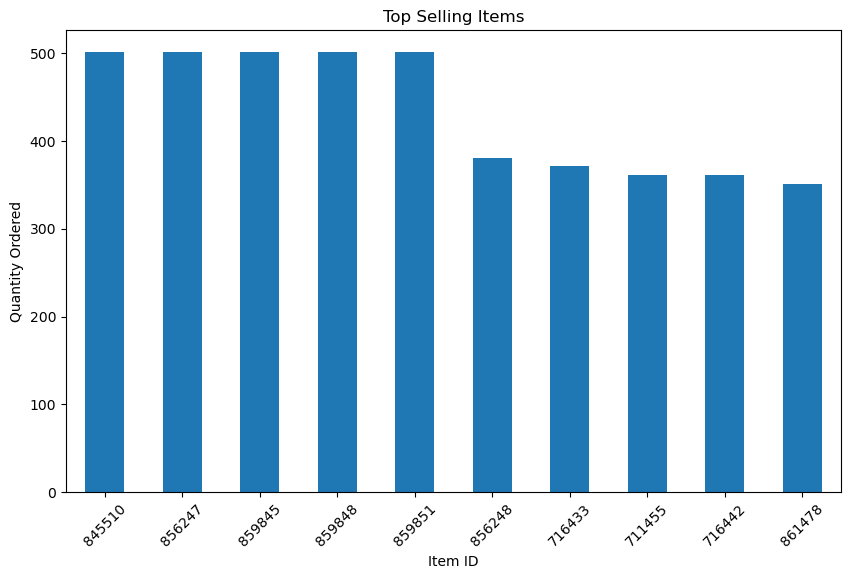

In [40]:
# Plotting top selling items
plt.figure(figsize=(10, 6))
top_selling_items.plot(kind='bar')
plt.title('Top Selling Items')
plt.xlabel('Item ID')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

# Sales by Category

In [47]:
# Group by category and sum total sales value
sales_by_category = main_df.groupby('category')['total'].sum()

In [49]:
# Convert pandas Series to DataFrame for Plotly
sales_by_category_df = sales_by_category.reset_index()
sales_by_category_df.columns = ['Category', 'Sales']


In [51]:
# Plot pie chart with Plotly
fig = px.pie(sales_by_category_df, values='Sales', names='Category', title='Sales by Category')

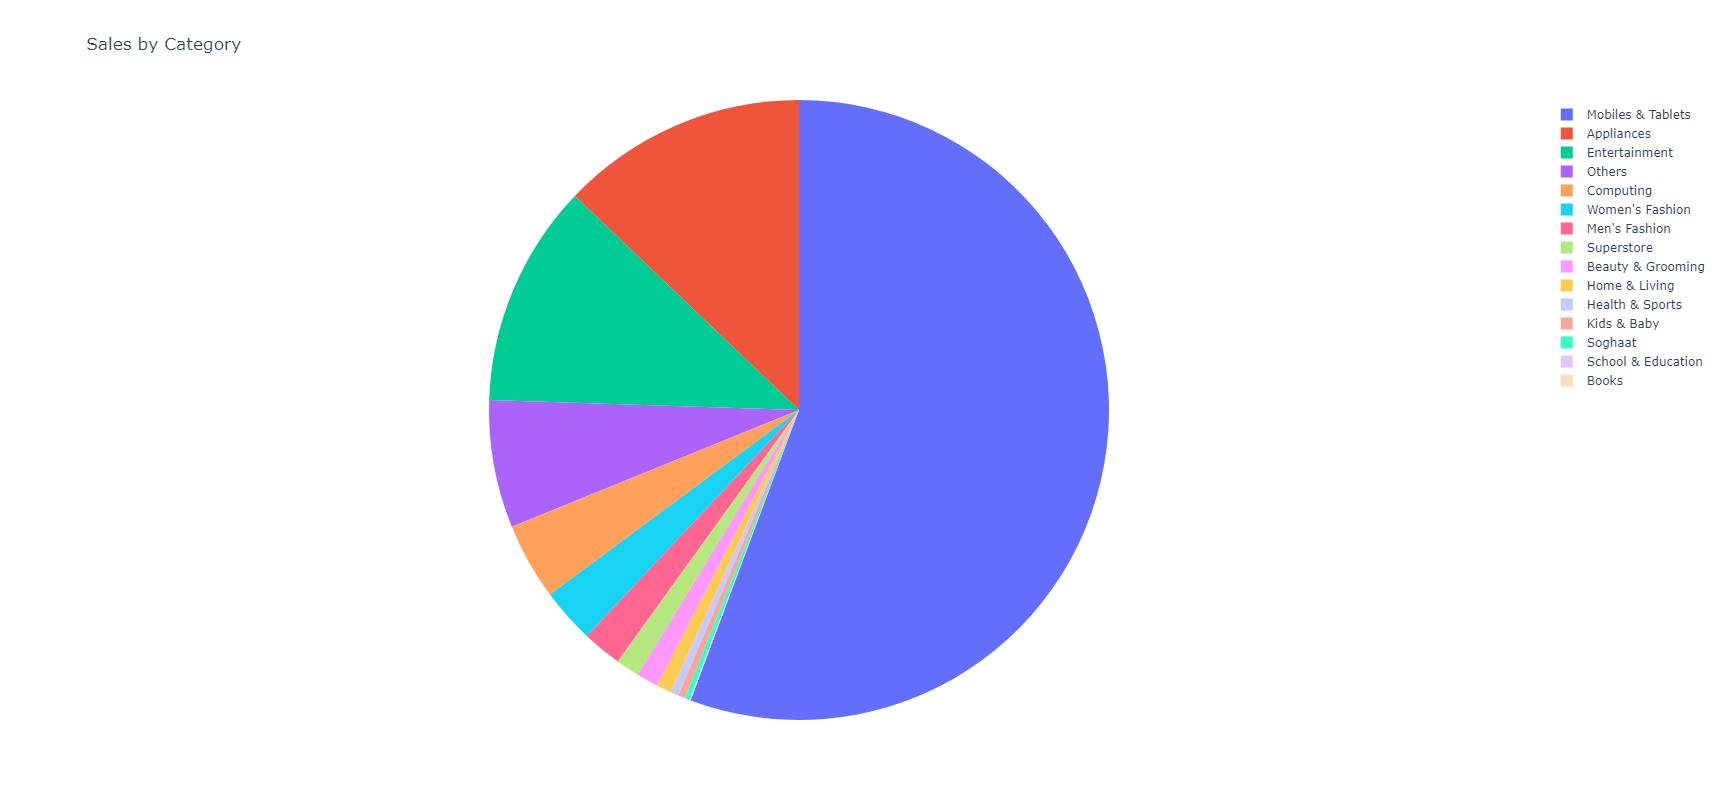

In [53]:
# Increase the size of the pie chart
fig.update_layout(width=800, height=800)

# Display label and percentage only on hover
fig.update_traces(hoverinfo='label+percent', textinfo='none')

fig.show()

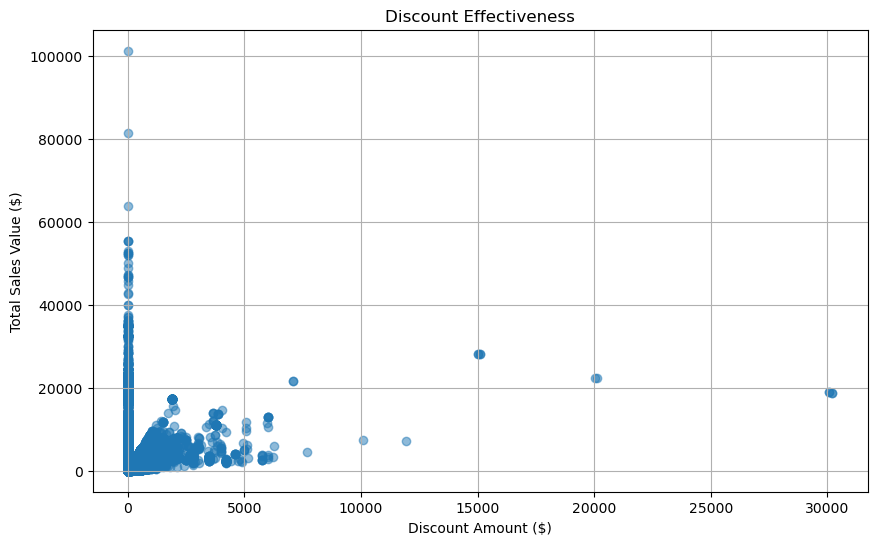

discount_amount          total
count    286392.000000  286392.000000
mean         70.039427     815.840507
std         256.880870    1983.580302
min           0.000000       0.000000
25%           0.000000      49.900000
50%           0.000000     149.800000
75%          18.383050     800.000000
max       30213.150000  101262.590000

In [55]:
# Discount Effectiveness
# Plotting scatter plot of discount amount vs. total sales value
plt.figure(figsize=(10, 6))
plt.scatter(main_df['discount_amount'], main_df['total'], alpha=0.5)
plt.title('Discount Effectiveness')
plt.xlabel('Discount Amount ($)')
plt.ylabel('Total Sales Value ($)')
plt.grid(True)
plt.show()

# Display numerical values as a table
display(main_df[['discount_amount', 'total']].describe())

# Discount Effectiveness

The mean discount amount is approximately $70, indicating that, on average, discounts are applied to orders. However, the median discount amount is $0, suggesting that a significant portion of orders do not have any discounts applied. The maximum discount amount is notably high at $30,213.15, showcasing instances of substantial discounts being offered. Concerning total sales, the mean is approximately $816, with a median of $149.80, implying a considerable variation in sales values across orders. Notably, the maximum total sales value exceeds $101,262.59.

Overall, while discounts are applied across orders, their effectiveness in driving sales is unclear from these summary statistics alone. The presence of substantial discounts and high sales values suggests that discounts may influence purchasing behavior positively. However, the prevalence of orders with no discounts and the substantial variability in sales values indicate that other factors beyond discounts, such as product demand, marketing strategies, and customer preferences, may also significantly impact sales. Therefore, determining whether increasing or decreasing discounts improves sales would require a more in-depth analysis, considering additional variables and potentially conducting experiments or A/B testing to assess the direct impact of discount variations on sales performance.

In [58]:
# Payment Method Preference
# Count the number of orders for each payment method
payment_method_counts = main_df['payment_method'].value_counts().reset_index()
payment_method_counts.columns = ['Payment Method', 'Count']

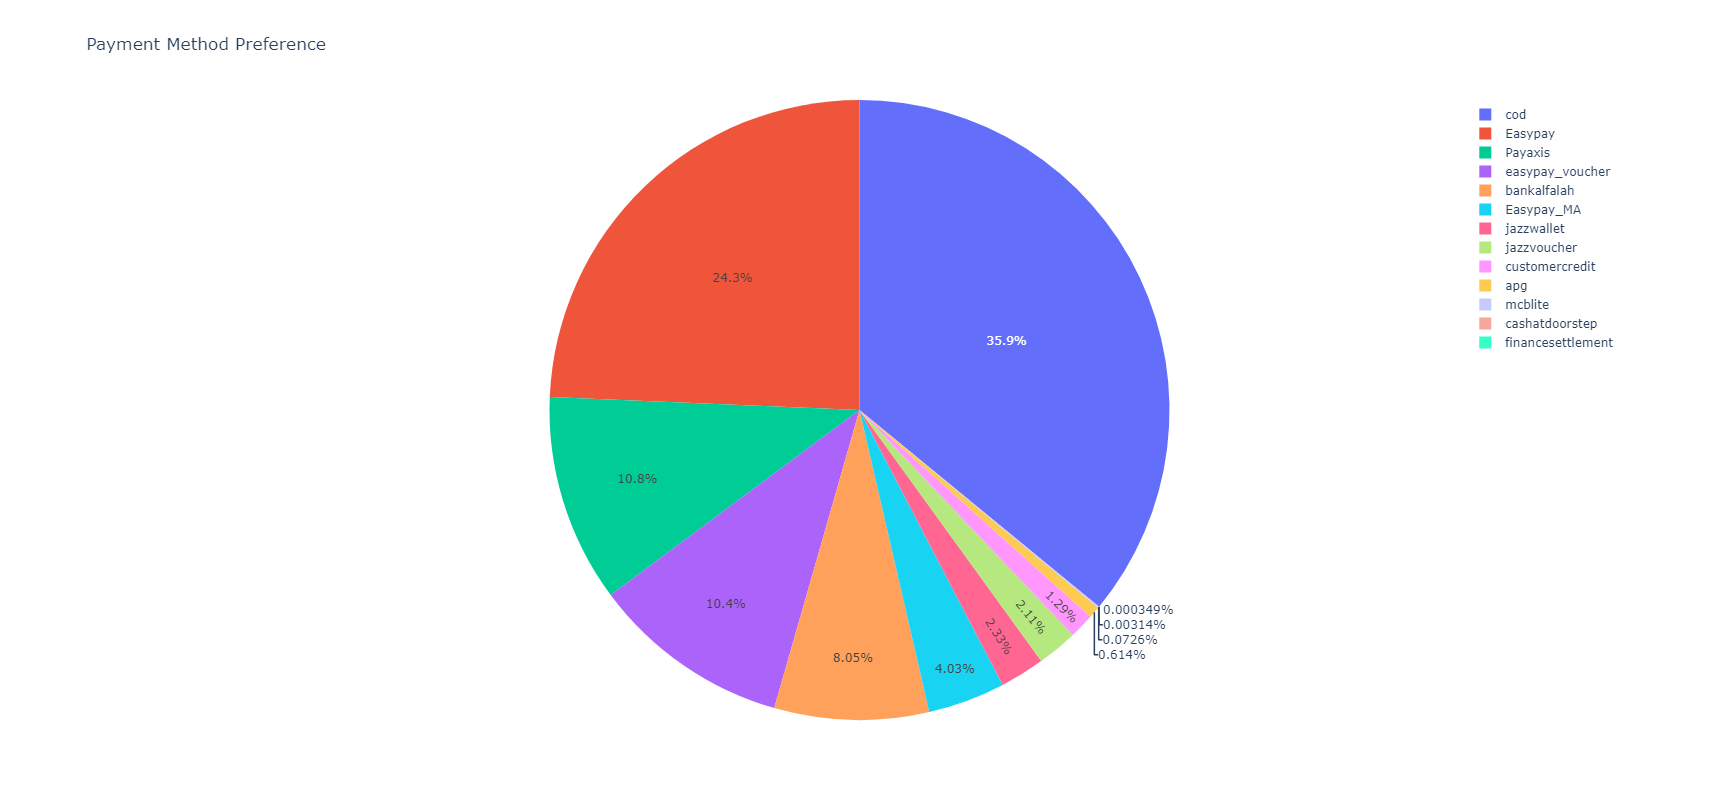

In [60]:
# Plotting payment method preference with Plotly Express
fig = px.pie(payment_method_counts, values='Count', names='Payment Method', title='Payment Method Preference',
             hover_data=['Count'], labels={'Count': 'Number of Orders'})

# Increase the size of the pie chart
fig.update_layout(width=800, height=800)

# Show figure
fig.show()

# Sales by Region

In [258]:
# Group by region and category, and sum total sales value
sales_by_region_category = main_df.groupby(['Region', 'category'])['total'].sum().reset_index()

In [260]:
# Calculate percentage of sales for each category within each region
sales_by_region_category['percentage'] = sales_by_region_category.groupby('Region')['total'].transform(lambda x: x / x.sum() * 100)

In [262]:
# Color code the categories
colors = px.colors.qualitative.Set3

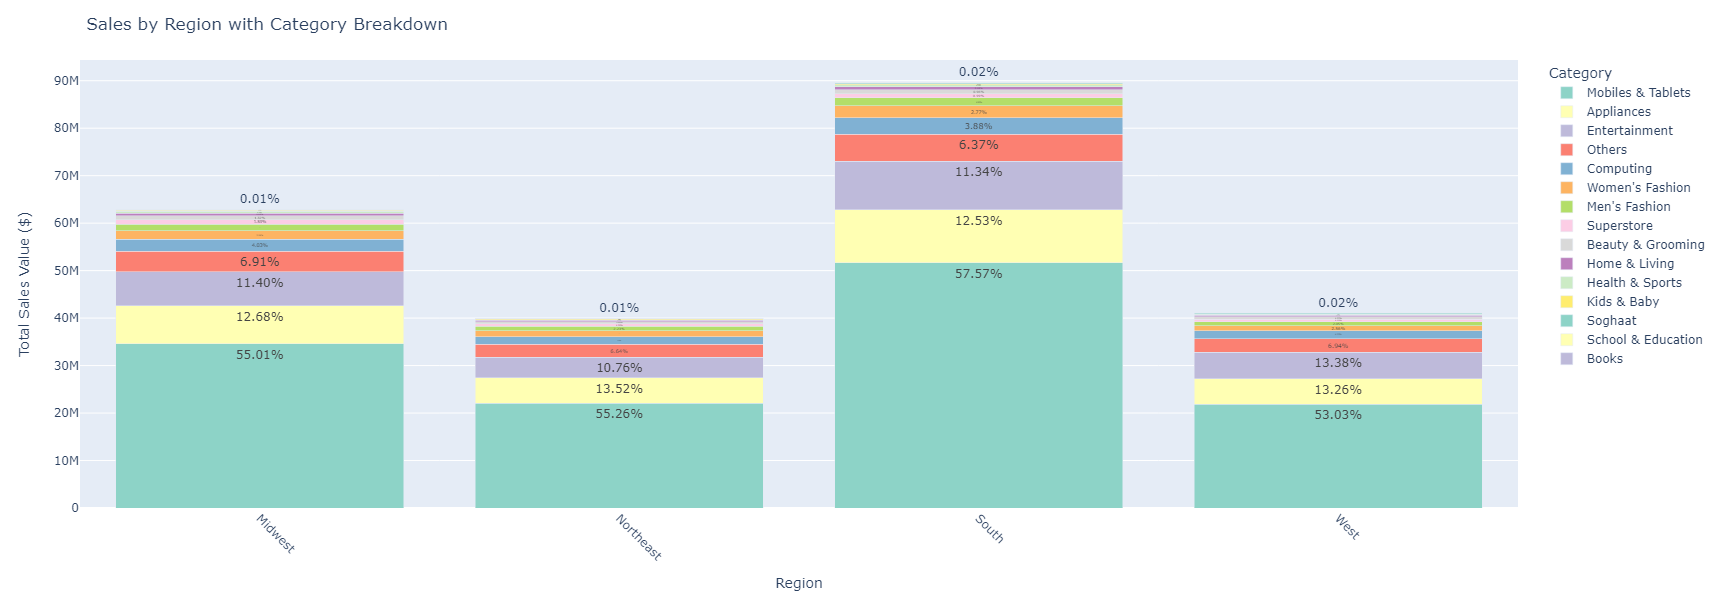

In [284]:
# Group by region and sum total sales value
sales_by_region = main_df.groupby(['Region', 'category'])['total'].sum().reset_index()

# Calculate percentage of sales for each category within each region
sales_by_region['percentage'] = sales_by_region.groupby('Region')['total'].transform(lambda x: x / x.sum() * 100)

# Sort the data by total sales value in descending order
sales_by_region = sales_by_region.sort_values(by=['Region', 'total'], ascending=[True, False])

# Color code the categories
colors = px.colors.qualitative.Set3

# Plotting sales by region with breakdown by category
fig = px.bar(sales_by_region, x='Region', y='total', color='category', 
             text='percentage', color_discrete_sequence=colors,
             labels={'total': 'Total Sales Value ($)', 'category': 'Category', 'percentage': 'Percentage of Sales (%)'})

# Add percentage value to hover information
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Customize layout
fig.update_layout(title='Sales by Region with Category Breakdown',
                  xaxis_title='Region',
                  yaxis_title='Total Sales Value ($)',
                  xaxis=dict(tickangle=45),
                  legend_title='Category',
                  width=1000,  # Adjust width as needed
                  height=600,  # Adjust height as needed
                  barmode='stack')  # Adjust to stack bars

# Show the plot
fig.show()



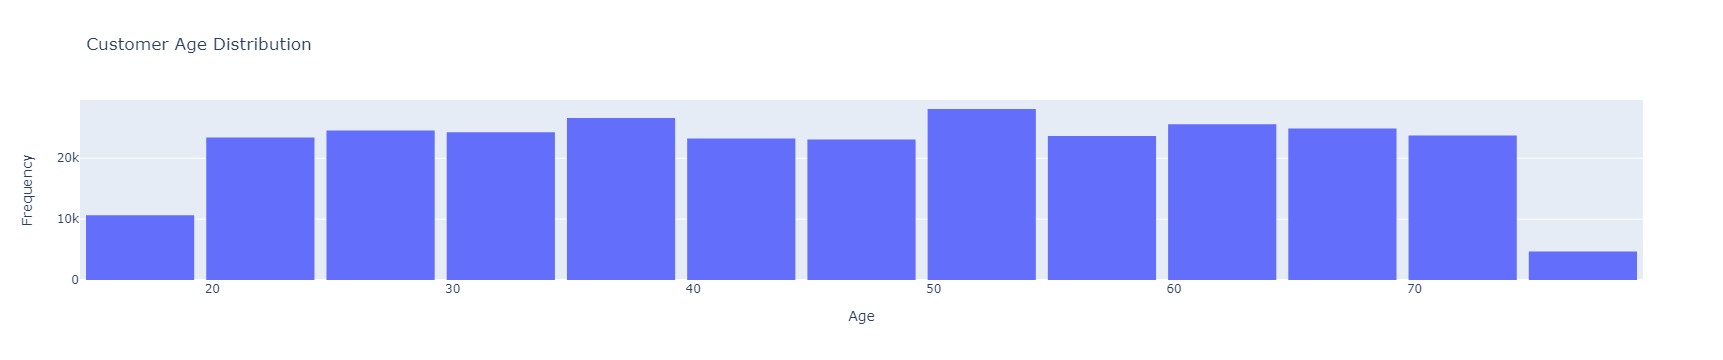

In [282]:
# Customer Age Distribution
# Create an interactive histogram with Plotly
fig = px.histogram(main_df, x='age', nbins=20, title='Customer Age Distribution')
fig.update_layout(xaxis_title='Age', yaxis_title='Frequency', bargap=0.1)
fig.show()

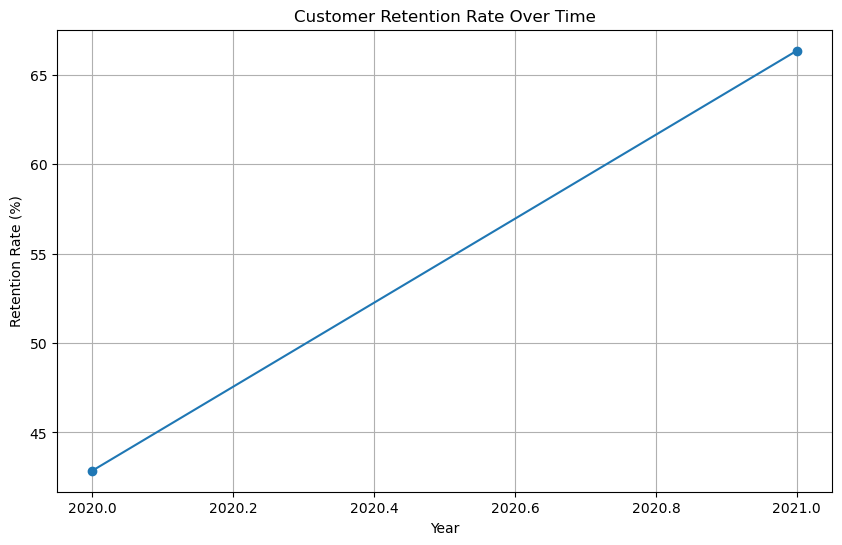

In [95]:
# Customer Retention Rate

# Convert 'order_date' column to datetime with the correct format
main_df['order_date'] = pd.to_datetime(main_df['order_date'], format='%d/%m/%Y')

# Group by year and count unique customer IDs to calculate retention rate
customer_retention_rate = main_df.groupby(main_df['order_date'].dt.year)['cust_id'].nunique() / main_df['cust_id'].nunique() * 100

# Plotting customer retention rate over time
plt.figure(figsize=(10, 6))
plt.plot(customer_retention_rate.index, customer_retention_rate.values, marker='o')
plt.title('Customer Retention Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Retention Rate (%)')
plt.grid(True)
plt.show()


In [119]:
# Average Order Value Over Time

# Aggregate average order value by month
avg_order_value = main_df.resample('M', on='order_date')['total'].mean()

In [123]:
# Calculate percentage change of average order value over time
percentage_change = avg_order_value.pct_change() * 100

In [125]:
# Create an interactive line chart with Plotly
fig = go.Figure()

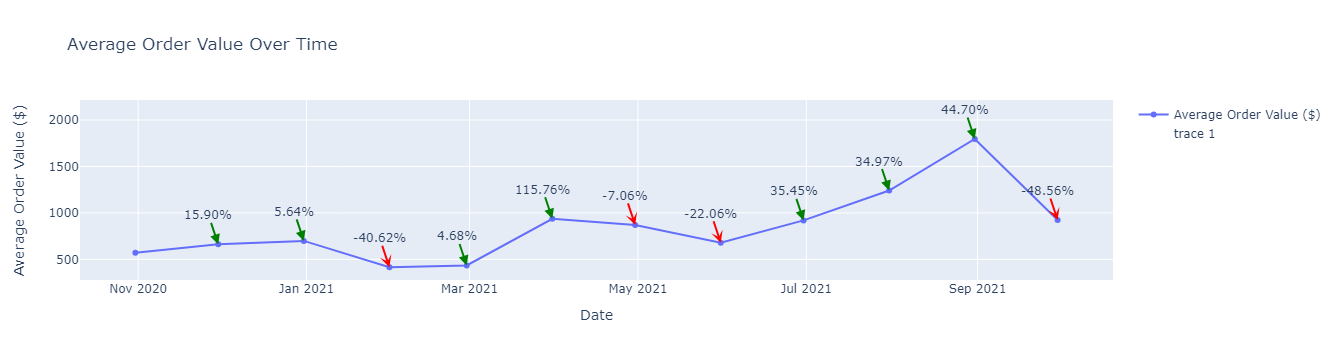

In [127]:
# Add trace for the line chart
fig.add_trace(go.Scatter(x=avg_order_value.index, y=avg_order_value.values,
                         mode='lines+markers', name='Average Order Value ($)'))

# Add custom hover label with details and percentage change
hover_text = [f'Date: {date}<br>Average Order Value: ${value:.2f}<br>Percentage Change: {change:.2f}%'
              for date, value, change in zip(avg_order_value.index, avg_order_value.values, percentage_change)]
fig.add_trace(go.Scatter(x=avg_order_value.index, y=avg_order_value.values,
                         mode='markers', marker=dict(color='rgba(0,0,0,0)'),
                         hoverinfo='text', hovertext=hover_text))

# Update layout
fig.update_layout(title='Average Order Value Over Time',
                  xaxis_title='Date', yaxis_title='Average Order Value ($)',
                  hovermode='closest')

# Add annotations for percentage change with colored arrows
for i in range(1, len(avg_order_value)):
    if percentage_change.iloc[i] > 0:
        fig.add_annotation(x=avg_order_value.index[i], y=avg_order_value.values[i],
                           text=f'{percentage_change.iloc[i]:.2f}%', showarrow=True,
                           arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='green')
    elif percentage_change.iloc[i] < 0:
        fig.add_annotation(x=avg_order_value.index[i], y=avg_order_value.values[i],
                           text=f'{percentage_change.iloc[i]:.2f}%', showarrow=True,
                           arrowhead=3, arrowsize=1, arrowwidth=2, arrowcolor='red')

# Show interactive chart
fig.show()



In [145]:
# Correlation Analysis

# Exclude non-numeric columns from correlation analysis
numeric_columns = main_df.select_dtypes(include=[np.number])

In [147]:
# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

In [149]:
# Function to classify correlation strength
def classify_correlation(correlation):
    if correlation > 0.7:
        return 'High'
    elif correlation > 0.3:
        return 'Medium'
    else:
        return 'Low'


In [151]:
# Create hover text for each cell in the heatmap
hover_text = []
for i in range(len(correlation_matrix.index)):
    row = correlation_matrix.iloc[i]
    hover_text.append([f'{col}: {correlation:.2f} ({classify_correlation(correlation)})' for col, correlation in zip(row.index, row)])


In [153]:
# Create a heatmap trace
heatmap = go.Heatmap(z=correlation_matrix.values,
                     x=correlation_matrix.columns,
                     y=correlation_matrix.index,
                     hovertext=hover_text,
                     colorscale='viridis',
                     colorbar=dict(title='Correlation'))

In [155]:
# Create a figure and add the heatmap trace
fig = go.Figure(data=heatmap)


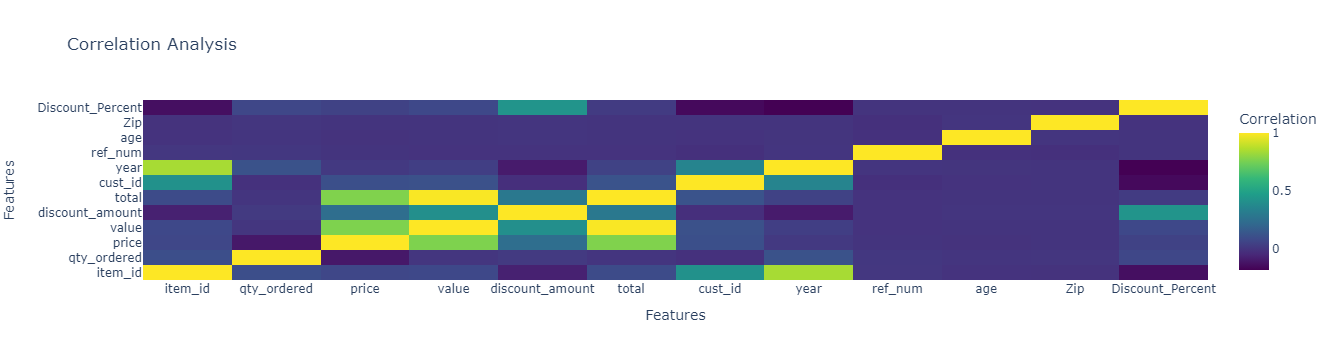

In [157]:
# Update layout
fig.update_layout(title='Correlation Analysis',
                  xaxis=dict(title='Features'),
                  yaxis=dict(title='Features'))

# Show interactive chart
fig.show()

In [159]:
# Sales Performance by Month/Year

# Convert 'month' to datetime
main_df['month'] = pd.to_datetime(main_df['month'], format='%b-%y')

In [161]:
# Sort DataFrame by 'year' and 'month'
main_df = main_df.sort_values(by=['year', 'month'])

In [163]:
# Sales Performance by Month/Year
sales_performance = main_df.groupby([main_df['year'], main_df['month']])['total'].sum()

In [165]:
# Convert multi-index series to DataFrame for easier manipulation
sales_performance_df = sales_performance.unstack()

In [167]:
# Create a dictionary to map month abbreviations to their indices
month_indices = {month_abbr: i for i, month_abbr in enumerate(calendar.month_abbr) if month_abbr}

In [169]:
# Extract only the month abbreviations (MMM) from the column names
months = sales_performance_df.columns
months_sorted = sorted(months, key=lambda x: x.month)  # Sort by month (as Timestamp objects)

In [171]:
# Reindex DataFrame with sorted months
sales_performance_df = sales_performance_df.reindex(columns=months_sorted)

In [173]:
# Calculate percentage change
sales_performance_pct_change = sales_performance_df.pct_change(fill_method=None) * 100

In [175]:
# Create hover text for each data point
hover_text = []
for col in sales_performance_df.columns:
    hover_text.append([f'Total Sales: ${value:.2f}<br>Percentage Change: {pct_change:.2f}%' 
                       for value, pct_change in zip(sales_performance_df[col], sales_performance_pct_change[col])])

In [177]:
# Extract year and month from the index
years = [str(year) for year in sales_performance_df.index]

In [179]:
# Create a range of dates covering all months and years
date_range = pd.date_range(start=min(main_df['month']), end=max(main_df['month']), freq='MS')

In [180]:
# Create traces for each year
data = []
for year_index, year in enumerate(years):
    trace = go.Bar(
        x=date_range,
        y=sales_performance_df.iloc[year_index],
        hovertext=hover_text[year_index],
        name=year
    )
    data.append(trace)

In [181]:
# Create layout
layout = go.Layout(
    title='Sales Performance by Month/Year',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Total Sales Value ($)'),
    hovermode='closest'
)

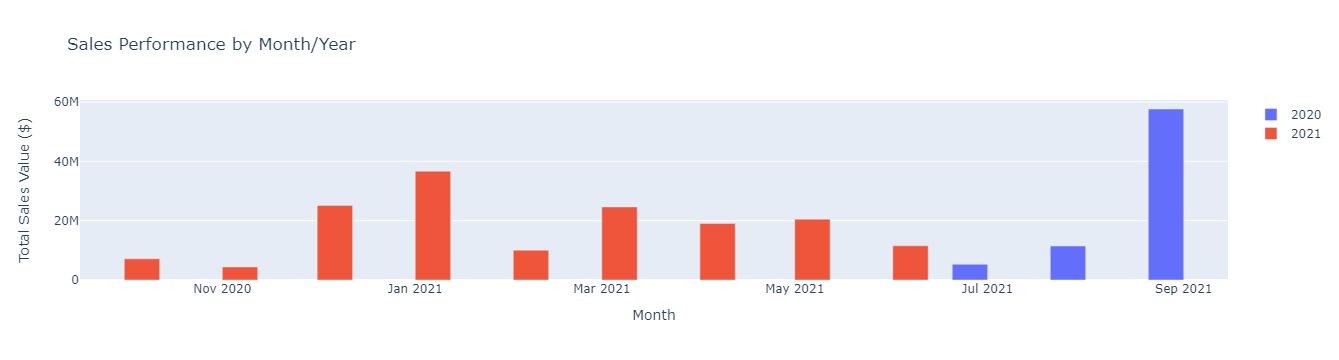

In [185]:
# Create figure
fig = go.Figure(data=data, layout=layout)

# Show interactive chart
fig.show()

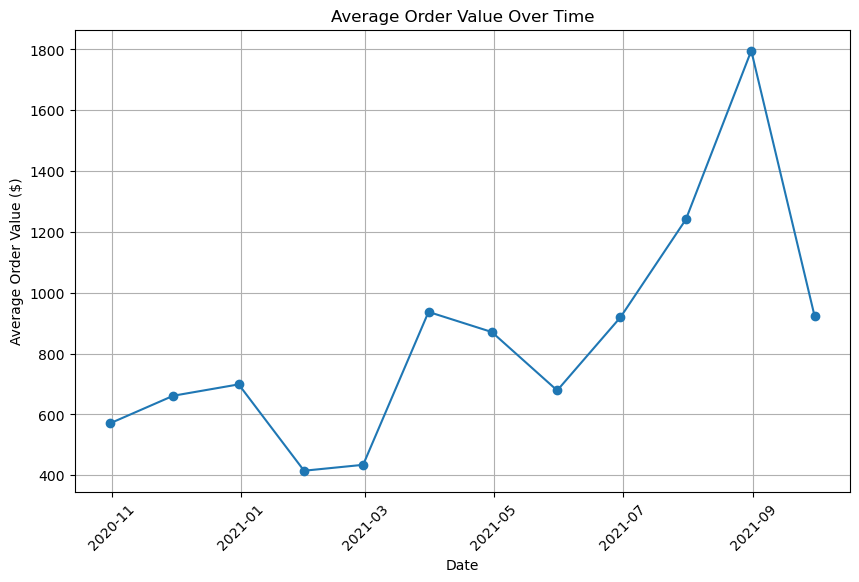

In [189]:
# Average Order Value Over Time
# Aggregate average order value by month
avg_order_value = main_df.resample('M', on='order_date')['total'].mean()

# Plotting average order value over time
plt.figure(figsize=(10, 6))
plt.plot(avg_order_value.index, avg_order_value.values, marker='o')
plt.title('Average Order Value Over Time')
plt.xlabel('Date')
plt.ylabel('Average Order Value ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


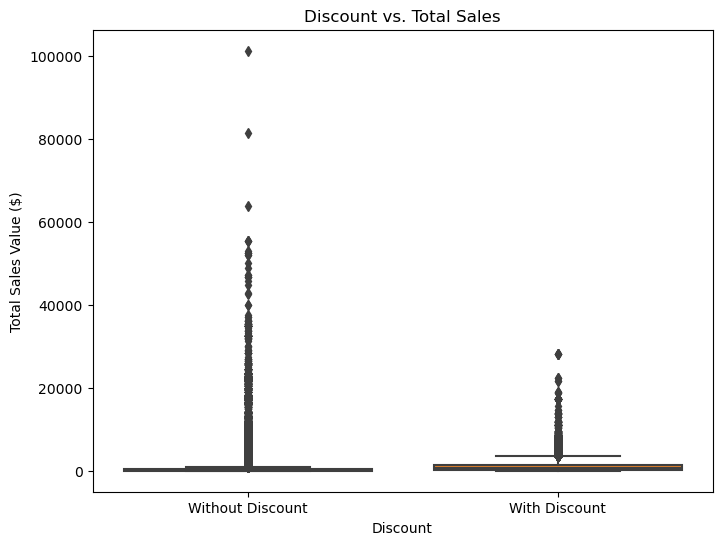

In [191]:
# Discount vs. Total Sales
# Plotting box plot comparing total sales for orders with and without discounts
plt.figure(figsize=(8, 6))
sns.boxplot(x=main_df['discount_amount'].apply(lambda x: 'With Discount' if x > 0 else 'Without Discount'), y=main_df['total'])
plt.title('Discount vs. Total Sales')
plt.xlabel('Discount')
plt.ylabel('Total Sales Value ($)')
plt.show()